# Homework Unsupervised Learning Clustering

## Import Library

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [161]:
# Load from Local
data = pd.read_csv('College.csv')

## See Data

In [162]:
# See data
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [163]:
# See how many row and columns
data.shape

(777, 19)

In [164]:
# Understanding Variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [165]:
## See statistical summary
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Data Cleaning

In [166]:
# Drop Duplicate Data
data = data.drop_duplicates()

In [167]:
# See how many row and columns after drop duplicate data
data.shape

# There are not duplicate data

(777, 19)

In [168]:
# Check missing value
data.isnull().sum()

# There are no missing value

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## Check Distribution Data and Outlier

##### Variable which are have allowed outliers (because total students and capacity every campus are different):
1. Apps
2. Accept
3. Enroll
4. F.Undergrad
5. P.Undergrad

##### Variable which are have allowed outliers (because fee every states have different price):
6. Outstate
7. Room.Board
8. Books
9. Personal
10. Expend

##### Variable which are have allowed outliers (because total PhD and Terminal every campus have are different):
11. PhD
12. Terminal

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


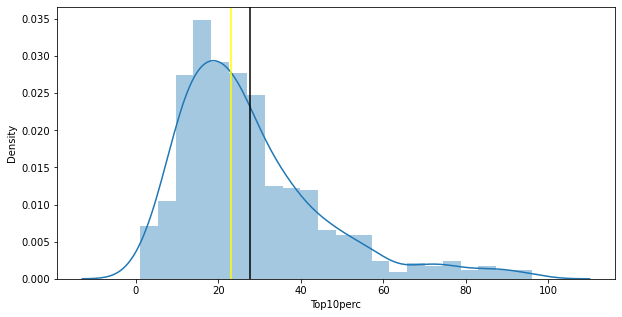

In [169]:
# Look Distribution of Top10perc
plt.figure(figsize=(10,5))
sns.distplot(data['Top10perc'])
plt.axvline(data['Top10perc'].median(),color='yellow')
plt.axvline(data['Top10perc'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


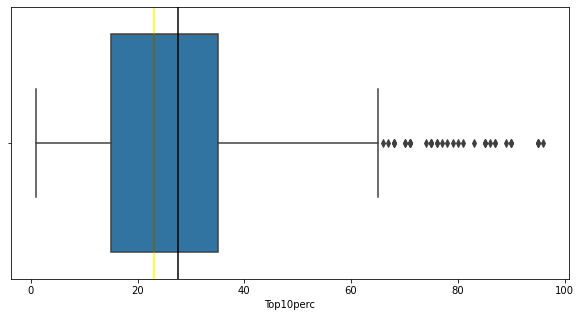

In [170]:
# Look Distribution of Top10perc with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Top10perc'])
plt.axvline(data['Top10perc'].median(),color='yellow')
plt.axvline(data['Top10perc'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


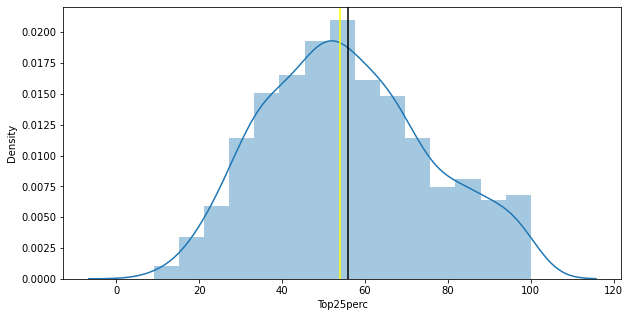

In [171]:
# Look Distribution of Top25perc
plt.figure(figsize=(10,5))
sns.distplot(data['Top25perc'])
plt.axvline(data['Top25perc'].median(),color='yellow')
plt.axvline(data['Top25perc'].mean(),color='black')
plt.show()
# there are no outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


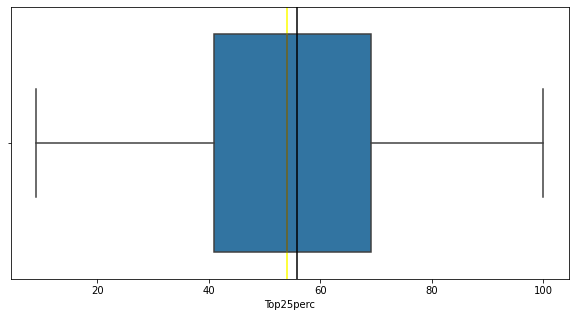

In [172]:
# Look Distribution of Top25perc with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Top25perc'])
plt.axvline(data['Top25perc'].median(),color='yellow')
plt.axvline(data['Top25perc'].mean(),color='black')
plt.show()
# there are no outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


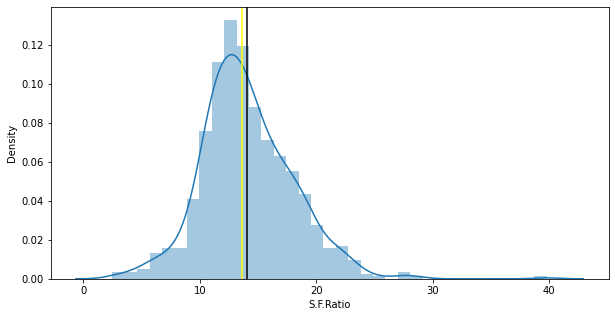

In [173]:
# Look Distribution of S.F.Ratio
plt.figure(figsize=(10,5))
sns.distplot(data['S.F.Ratio'])
plt.axvline(data['S.F.Ratio'].median(),color='yellow')
plt.axvline(data['S.F.Ratio'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


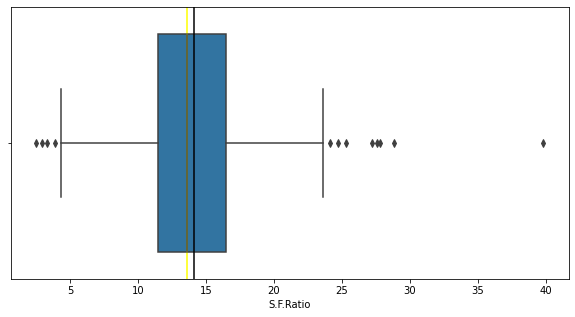

In [174]:
# Look Distribution of S.F.Ratio with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['S.F.Ratio'])
plt.axvline(data['S.F.Ratio'].median(),color='yellow')
plt.axvline(data['S.F.Ratio'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


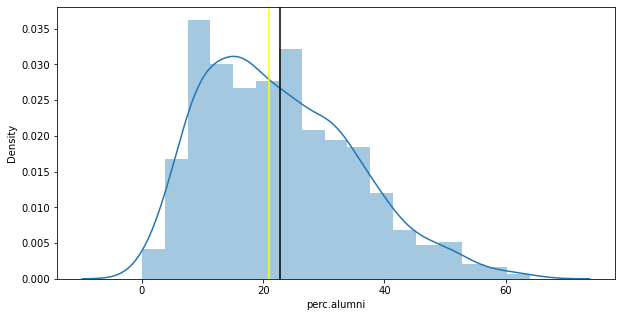

In [175]:
# Look Distribution of perc.alumni
plt.figure(figsize=(10,5))
sns.distplot(data['perc.alumni'])
plt.axvline(data['perc.alumni'].median(),color='yellow')
plt.axvline(data['perc.alumni'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


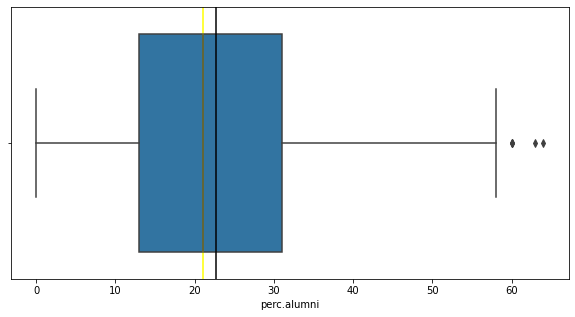

In [176]:
# Look Distribution of perc.alumni with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['perc.alumni'])
plt.axvline(data['perc.alumni'].median(),color='yellow')
plt.axvline(data['perc.alumni'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


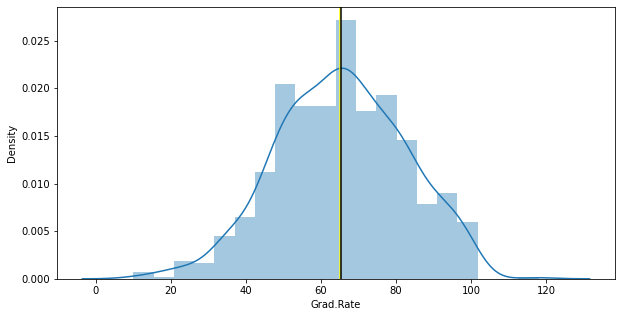

In [177]:
# Look Distribution of Grad.Rate
plt.figure(figsize=(10,5))
sns.distplot(data['Grad.Rate'])
plt.axvline(data['Grad.Rate'].median(),color='yellow')
plt.axvline(data['Grad.Rate'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


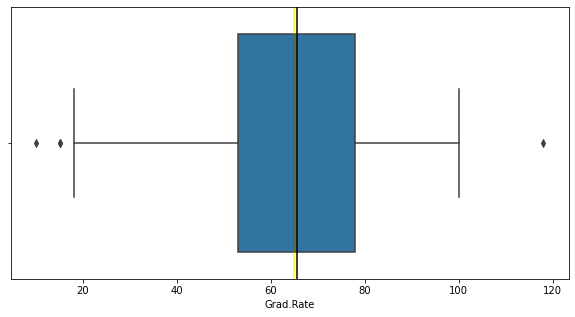

In [178]:
# Look Distribution of Grad.Rate with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Grad.Rate'])
plt.axvline(data['Grad.Rate'].median(),color='yellow')
plt.axvline(data['Grad.Rate'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

In [179]:
# Make function to detect outlier using IQR Method
def check_outlier(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(data[data>upper_range])+len(data[data<lower_range])
    print("Total number of Outlier From Variable {} : {}".format(data.name, number_outlier))
    print("Upper Range Outlier From Variable {} : {}".format(data.name, len(data[data>upper_range])))    
    print("Lower Range Outlier From Variable {} : {}\n".format(data.name, len(data[data<lower_range])))

In [180]:
check_outlier(data['Top10perc'])
check_outlier(data['Top25perc'])
check_outlier(data['S.F.Ratio'])
check_outlier(data['perc.alumni'])
check_outlier(data['Grad.Rate'])

Total number of Outlier From Variable Top10perc : 39
Upper Range Outlier From Variable Top10perc : 39
Lower Range Outlier From Variable Top10perc : 0

Total number of Outlier From Variable Top25perc : 0
Upper Range Outlier From Variable Top25perc : 0
Lower Range Outlier From Variable Top25perc : 0

Total number of Outlier From Variable S.F.Ratio : 12
Upper Range Outlier From Variable S.F.Ratio : 8
Lower Range Outlier From Variable S.F.Ratio : 4

Total number of Outlier From Variable perc.alumni : 5
Upper Range Outlier From Variable perc.alumni : 5
Lower Range Outlier From Variable perc.alumni : 0

Total number of Outlier From Variable Grad.Rate : 4
Upper Range Outlier From Variable Grad.Rate : 1
Lower Range Outlier From Variable Grad.Rate : 3



## Handling Outlier

In [181]:
#See observation outliers on the Top10perc
Q1=data["Top10perc"].quantile(0.25)
Q3=data["Top10perc"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['Top10perc']>upper_range),'Top10perc']=upper_range
check_outlier(data['Top10perc'])

Total number of Outlier From Variable Top10perc : 0
Upper Range Outlier From Variable Top10perc : 0
Lower Range Outlier From Variable Top10perc : 0



In [182]:
#See observation outliers on the S.F.Ratio
Q1=data["S.F.Ratio"].quantile(0.25)
Q3=data["S.F.Ratio"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['S.F.Ratio']>upper_range),'S.F.Ratio']=upper_range
data.loc[(data['S.F.Ratio']<lower_range),'S.F.Ratio']=lower_range
check_outlier(data['S.F.Ratio'])

Total number of Outlier From Variable S.F.Ratio : 0
Upper Range Outlier From Variable S.F.Ratio : 0
Lower Range Outlier From Variable S.F.Ratio : 0



In [183]:
#See observation outliers on the perc.alumni
Q1=data["perc.alumni"].quantile(0.25)
Q3=data["perc.alumni"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['perc.alumni']>upper_range),'perc.alumni']=upper_range
check_outlier(data['perc.alumni'])

Total number of Outlier From Variable perc.alumni : 0
Upper Range Outlier From Variable perc.alumni : 0
Lower Range Outlier From Variable perc.alumni : 0



In [184]:
#See observation outliers on the Grad.Rate
Q1=data["Grad.Rate"].quantile(0.25)
Q3=data["Grad.Rate"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['Grad.Rate']>upper_range),'Grad.Rate']=upper_range
data.loc[(data['Grad.Rate']<lower_range),'Grad.Rate']=lower_range
check_outlier(data['Grad.Rate'])

Total number of Outlier From Variable Grad.Rate : 0
Upper Range Outlier From Variable Grad.Rate : 0
Lower Range Outlier From Variable Grad.Rate : 0

